# Explore here

In [58]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


nos quedamos solo con  columnas Latitude, Longitude y MedInc.

In [59]:
total_data = data.drop([ 'HouseAge',"AveRooms","AveBedrms", "Population","AveOccup","MedHouseVal"], axis=1)
total_data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(total_data, test_size = 0.2, random_state = 12)

X_train.head()

,MedInc,Latitude,Longitude
1652,6.6134,37.93,-121.97
14652,2.3578,32.80,-117.15
3548,5.5111,34.25,-118.61
6730,8.1124,34.11,-118.14
18445,6.2957,37.25,-121.81


USAMOS EL ALGORITMO KMEANS DE CLUSTERING

In [61]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

model = KMeans(n_clusters = 6, random_state = 12, n_init="auto")
model.fit(X_train)

# Realizar predicciones con datos nuevos
# new_data = np.array([[2, 3], [0, 4], [3, 1]])
# predictions = model.predict(new_data)

KMeans(n_clusters=6, n_init='auto', random_state=12)

In [62]:
labels_train = model.labels_
labels_train
y_train = list(labels_train)
y_train
X_train["clustering"] = labels_train
X_train.head()


,MedInc,Latitude,Longitude,clustering
1652,6.6134,37.93,-121.97,1
14652,2.3578,32.80,-117.15,0
3548,5.5111,34.25,-118.61,5
6730,8.1124,34.11,-118.14,5
18445,6.2957,37.25,-121.81,1


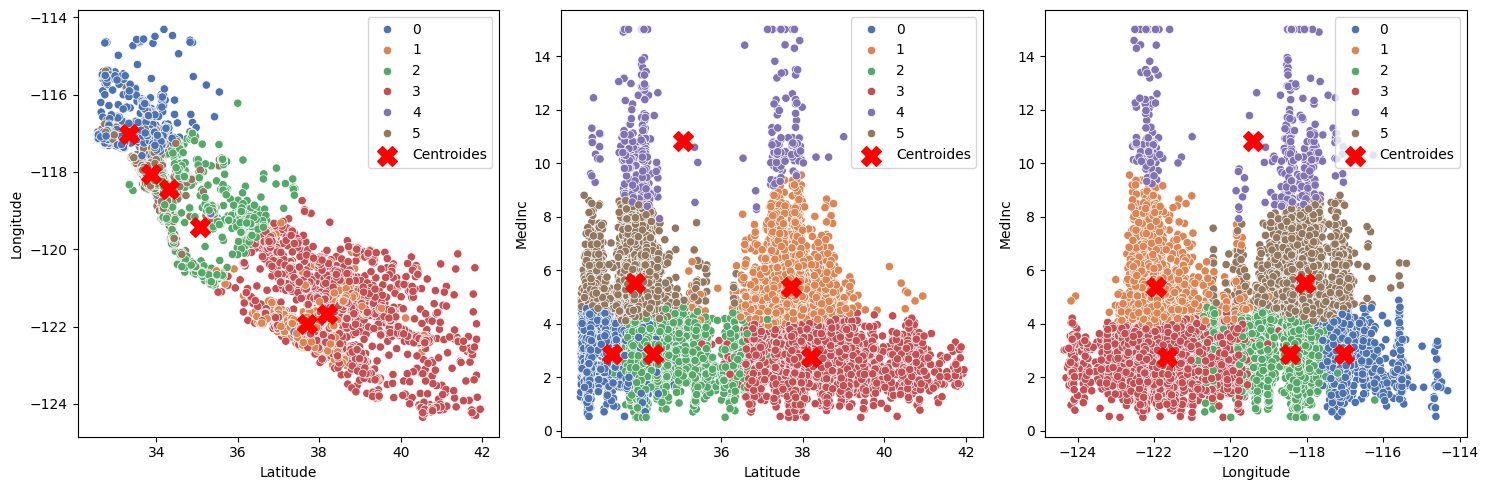

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Calcular los centroides
centroids = X_train.groupby('clustering').mean()

# Crear la figura y los ejes
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Graficar los datos y los centroides
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="clustering", palette="deep")
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="clustering", palette="deep")
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="clustering", palette="deep")

# Graficar los centroides
axis[0].scatter(centroids['Latitude'], centroids['Longitude'], marker='X', s=200, color='red', label='Centroides')
axis[1].scatter(centroids['Latitude'], centroids['MedInc'], marker='X', s=200, color='red', label='Centroides')
axis[2].scatter(centroids['Longitude'], centroids['MedInc'], marker='X', s=200, color='red', label='Centroides')

axis[0].legend()
axis[1].legend()
axis[2].legend()
plt.tight_layout()
plt.show()


observamos todos los grupos de puestos agrupados por cluster, podemos observar el centroide marcado con la X , que se situa en el punto media de todoas las distancias de los puntos que forman cada cluster

PREDICCION DEL MODELO 

In [67]:
y_test = list(model.predict(X_test))
X_test["clustering"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,clustering
6906,4.3646,34.04,-118.13,5
767,2.8203,37.65,-122.09,3
10555,4.5909,33.63,-117.71,5
17456,3.6023,34.69,-120.43,2
20617,3.3021,39.06,-121.53,3


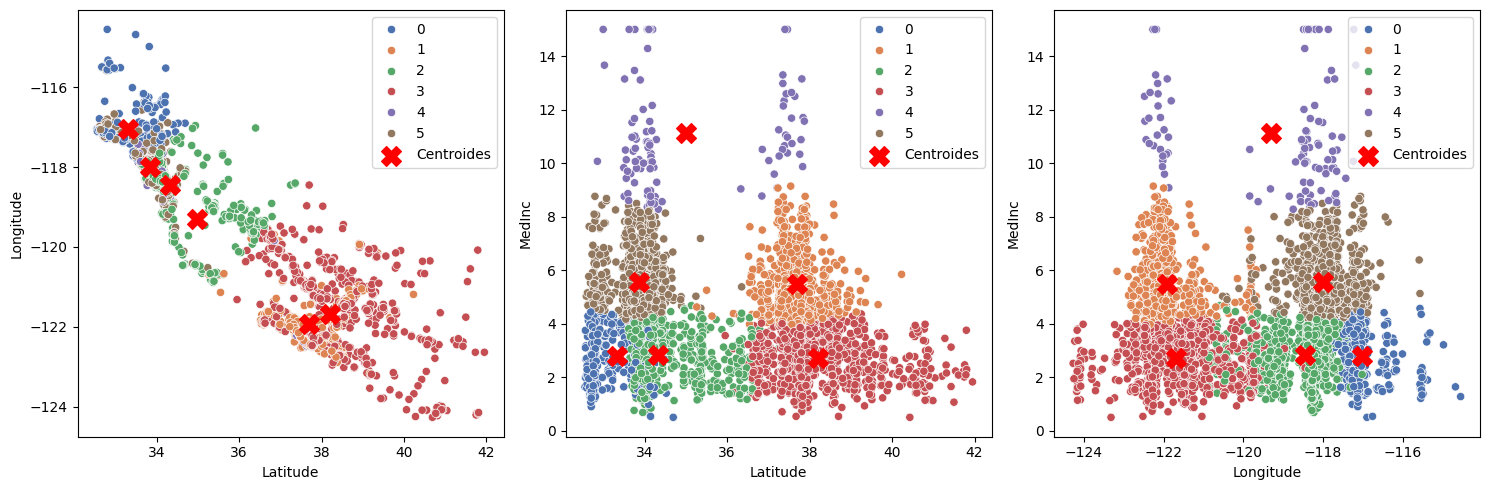

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Calcular los centroides
centroids = X_test.groupby('clustering').mean()

# Crear la figura y los ejes
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Graficar los datos y los centroides
sns.scatterplot(ax=axis[0], data=X_test, x="Latitude", y="Longitude", hue="clustering", palette="deep")
sns.scatterplot(ax=axis[1], data=X_test, x="Latitude", y="MedInc", hue="clustering", palette="deep")
sns.scatterplot(ax=axis[2], data=X_test, x="Longitude", y="MedInc", hue="clustering", palette="deep")

# Graficar los centroides
axis[0].scatter(centroids['Latitude'], centroids['Longitude'], marker='X', s=200, color='red', label='Centroides')
axis[1].scatter(centroids['Latitude'], centroids['MedInc'], marker='X', s=200, color='red', label='Centroides')
axis[2].scatter(centroids['Longitude'], centroids['MedInc'], marker='X', s=200, color='red', label='Centroides')

axis[0].legend()
axis[1].legend()
axis[2].legend()
plt.tight_layout()
plt.show()

observando estos graficos de prediccion y los de arriba podemos ver que se asemjan significativambte los valores predichos a los reales

In [72]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier (random_state = 12)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=12)

In [73]:
y_pred = model.predict(X_test)
y_pred

array([5, 3, 5, ..., 3, 3, 2], dtype=int32)

In [74]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

hemos obtenido un buen resultado

In [77]:
from pickle import dump

dump(model, open("../models/randomforest.sav", "wb"))